In [1]:
import pandas as pd
import re

In [2]:
txt = pd.read_csv("eng_corp.csv")
txt

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...


In [3]:
#抽取cnn title, content
cnn = txt[txt['publication'].str.contains("CNN")]
cnn = cnn[['title','content']]
cnn
no_cnn = []
for i in cnn['content']:
    no_cnn.append(i.replace('(CNN)','').replace('Washington','').replace('Houston',''))
no_cnn
cnn['content'] = no_cnn

cnn

,title,content
31584,Istanbul attack: Dozens killed at nightclub,Istanbul At least 39 people were killed and a...
31585,"Alabama, Clemson back in national title game",Atlanta This season’s College Football Playof...
31586,New year celebrations ring in 2017,Revelers on the United States’ west coast ch...
31587,Trump says he has inside information on hacking,"West Palm Beach, Florida Donald Trump said S..."
31588,3 dead in Texas plane crash collision,Two small planes collided in Texas on Saturd...
...,...,...
43067,Zuckerberg’s important message on miscarriage,"Recently, Facebook CEO Mark Zuckerberg annou..."
43068,Is Zachery Anderson’s sex-offender label fair?...,Zachery Anderson was a college student wi...
43069,Malaysia reckless on MH370 facts,It appears that the Malaysian government has...
43070,Natalia Molchanova and the risks of freediving...,"Natalia Molchanova, perhaps the most highly ..."


# 主題分析

In [4]:
from nltk.tokenize import WordPunctTokenizer
import nltk
from nltk.corpus import stopwords  
stop_words = set(stopwords.words('english'))
import string  
punt = []
for i in string.punctuation:
    punt.append(i)
topic = cnn['title']

In [5]:
#POS
topic1 = []
for i in topic:
    topic1.append(nltk.word_tokenize(i))
topic2 = []
for i in topic1:
    topic2.append(nltk.pos_tag(i,tagset='universal'))


In [6]:
#Count POS
stopword = ['’','s','“','”']
pos1 = {}
for i in topic2:
    for j in i:
        if j[1] != "." and j[1] != "X" and j[0] not in stopword:
            pos1[j[1]] = pos1.get(j[1],0) + 1
                        
df1 = pd.DataFrame.from_dict(pos1,  orient='index', columns=['count'])
df1 = df1.sort_values(by='count',ascending=False)
df1["mean"] = df1['count']/df1['count'].sum()
df1

,count,mean
NOUN,47797,0.531633
VERB,13484,0.149979
ADP,9028,0.100416
ADJ,6660,0.074077
DET,3065,0.034091
PRT,2485,0.027640
ADV,2271,0.025260
PRON,2227,0.024770
NUM,2174,0.024181
CONJ,715,0.007953


In [7]:
#gerund
gerund = 0
for i in topic2:
    for j in i:
        if j[1] == 'NOUN' and j[0].endswith('ing'):
            gerund += 1
            print(j)
gerund

('hacking', 'NOUN')
('warning', 'NOUN')
('King', 'NOUN')
('nothing', 'NOUN')
('hacking', 'NOUN')
('meeting', 'NOUN')
('meaning', 'NOUN')
('shooting', 'NOUN')
('Horrifying', 'NOUN')
('funding', 'NOUN')
('meddling', 'NOUN')
('Everything', 'NOUN')
('clowning', 'NOUN')
('thing', 'NOUN')
('Beijing', 'NOUN')
('painting', 'NOUN')
('King', 'NOUN')
('hearing', 'NOUN')
('Ringling', 'NOUN')
('closing', 'NOUN')
('landing', 'NOUN')
('Stirling', 'NOUN')
('shooting', 'NOUN')
('living', 'NOUN')
('hearing', 'NOUN')
('kidnapping', 'NOUN')
('Manning', 'NOUN')
('Manning', 'NOUN')
('drilling', 'NOUN')
('funding', 'NOUN')
('Everything', 'NOUN')
('King', 'NOUN')
('ramming', 'NOUN')
('hearing', 'NOUN')
('morning', 'NOUN')
('meaning', 'NOUN')
('marching', 'NOUN')
('posturing', 'NOUN')
('meeting', 'NOUN')
('lynching', 'NOUN')
('meeting', 'NOUN')
('lobbying', 'NOUN')
('misleading', 'NOUN')
('Opening', 'NOUN')
('shooting', 'NOUN')
('conditioning', 'NOUN')
('sighting', 'NOUN')
('basking', 'NOUN')
('papering', 'NOU

670

In [8]:
topw = {}
for i in topic2:
    for j in i:
        if j[1] != "." and j[1] != "X" and j[0] not in stopword:
            topw[j[0]] = topw.get(j[0],0) + 1
topw = pd.DataFrame.from_dict(topw, orient='index', columns=['count'])
topw = topw.sort_values(by=['count'],ascending=False)
topw['mean'] = topw['count']/topw['count'].sum()
topw.head(10)

,count,mean
to,2093,0.023280
in,1906,0.021200
Trump,1745,0.019409
of,1326,0.014749
the,1128,0.012546
for,968,0.010767
on,949,0.010555
a,673,0.007486
and,536,0.005962
at,516,0.005739


In [9]:
#The frequence
The = 0
for i in topic:
    a = i.startswith('The')
    if a:
        The +=1
The

339

In [10]:
#Total noun
noun = []
verb = []
for i in topic2:
    for j in i:
        if j[1] == 'NOUN':
            noun.append(j[0])
        if j[1] == 'VERB':
            verb.append(j[0])
print("Total noun:",len(noun))

Total noun: 52459


In [11]:
#Verb details
totv = len(verb)
print('Total verb:',totv)
ing = []
ed = []
for i in verb:
    ing.append(i.endswith('ing'))
    ed.append(i.endswith('ed'))
print('ing:',ing.count(True)/totv)
print('ed:',ed.count(True)/totv)
print('be',(verb.count('be')+(verb.count('is'))+verb.count('was')+verb.count('are')+verb.count('were'))/totv)

being = []
for i in topic2:
    for j in range(0, len(i)):
        if i[j][0][0].isupper() and i[j][0].endswith('ing'):
            continue
        elif i[j][0].endswith('ing') and i[j-1][1] == 'VERB':
            being.append(i[j])
print('Gerund Total:',ing.count(True)-len(being))

Total verb: 15427
ing: 0.1128540869903416
ed: 0.14688533091333378
be 0.06183963181435146
Gerund Total: 1334


In [12]:
#start word
start = []
start_pos = {}
for i in topic2:
    start.append(i[0])
for i in start:
    start_pos[i[1]] = start_pos.get(i[1],0) + 1
start_pos = pd.DataFrame.from_dict(start_pos,  orient='index', columns=['count'])
start_pos["mean"] = start_pos['count']/start_pos['count'].sum()
start_pos

,count,mean
NOUN,7971,0.693854
NUM,343,0.029857
ADJ,1115,0.097058
ADV,531,0.046222
DET,495,0.043088
VERB,462,0.040216
ADP,239,0.020804
PRON,296,0.025766
CONJ,7,0.000609
.,21,0.001828


In [13]:
#Verbs in sentences
verb_w = []
for i in topic2:
    for j in i:
        if j[1] == 'VERB' and j[0] != 's':
            verb_w.append(j[0])
verb_w2 = []
for i in verb_w:
    if i in verb_w2:
        continue
    else:
        verb_w2.append(i)
verb_w2

['killed',
 'ring',
 'says',
 'has',
 'inside',
 'rescued',
 '’',
 'charged',
 'equals',
 'ditches',
 'play',
 'reinstates',
 'searching',
 'halted',
 'ask',
 'will',
 'Trump',
 'reach',
 'congratulates',
 'missing',
 'downed',
 'rocks',
 'deliver',
 'made',
 'hatred',
 'claims',
 'shooting',
 'scores',
 'affects',
 'passed',
 'say',
 'was',
 'recommend',
 'accused',
 'being',
 'may',
 'affect',
 'knighted',
 'arrested',
 'depressing',
 'is',
 'shape',
 'got',
 'gives',
 'announced',
 'repeal',
 'questioned',
 'pull',
 'gut',
 'Facing',
 'growing',
 'vows',
 'won',
 'ruled',
 'sentencing',
 'found',
 'carrying',
 'defends',
 'hacking',
 'dominate',
 'see',
 'contradicts',
 'hacked',
 'should',
 'help',
 'decapitated',
 'can',
 'reshape',
 'ends',
 'linked',
 'take',
 'run',
 'convicted',
 'didn',
 'give',
 'emails',
 'derides',
 'briefing',
 'are',
 'delay',
 'host',
 'laments',
 'identified',
 'deport',
 'admin',
 'tells',
 'jittery',
 'molested',
 'end',
 'Preparing',
 'escape',
 'gr

In [14]:
#Phrase before the first verb
top_count = []
start_sen = []
for i in topic:
    sen = i.split()
    top_count.append(len(sen))
    for j in sen:
        if j in verb_w2:
            pos = i.find(j)
            if pos != -1 and len(i[0:pos]) != 0:
                    start_sen.append(i[0:pos])
                    break
            
start_count = []
for i in start_sen:
    split = i.split()
    start_count.append(len(split))
print("proportion to topic:",len(start_sen)/len(topic))
start_sen

proportion to topic: 0.8795264623955432


['Istanbul attack: Dozens ',
 'Alabama, Clemson ',
 'New year celebrations ',
 'Trump ',
 '3 ',
 '21 ',
 'Trump ',
 'US utility: Alleged Russian malware on ',
 'Roberts ',
 'Former ',
 'Liverpool ',
 'Greek ',
 'Police ',
 'Rebel ',
 'Trump ',
 'Skakel murder case: Court ',
 'Lake Erie ',
 'UFC: Rousey’s ',
 'Latino leaders ask: When ',
 'Putin ',
 'Kellyanne Conway’s ',
 'Allan Williams, The Beatles’ ',
 '3 ',
 'California earthquake ',
 'Obama to ',
 'How ',
 'Istanbul attack: ',
 'Trump’s ',
 'Mark Shriver to Trump: Don’t ',
 'Hill Republicans eye busy ',
 'Venomous ’Scorpion King’ ',
 'How your gut’s circadian rhythm ',
 'Pilot ',
 'Study: Stores ',
 'Turkey ',
 ' New Year’s resolution: Hold ',
 'Pilot ',
 'Parent obesity ',
 'Andy Murray ',
 'South Korea scandal: Choi Soon-sil’s ',
 '’Stray’ bullet ',
 'The bleak, ',
 'Chicago’s 762 homicides in 2016 ',
 'The new ',
 'The new buildings that ',
 'Chicago’s homicides: How we ',
 'Computer outage disrupts customs at ',
 'Trump ',
 'R

In [15]:
#Stat for phrase before the first verb
start_count = pd.DataFrame(start_count)
start_count.describe()

,0
count,10104.000000
mean,2.568587
std,1.649372
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,16.000000


In [16]:
#Stat for sentences
top_count = pd.DataFrame(top_count)
top_count.describe()

,0
count,11488.00000
mean,7.79718
std,2.10157
min,2.00000
25%,6.00000
50%,8.00000
75%,9.00000
max,22.00000


In [17]:
#number of sentence without verb
(len(top_count)-len(start_count))/len(top_count)

0.12047353760445682

# 內容分析

In [18]:
sen_token = nltk.data.load('tokenizers/punkt/english.pickle') 

contentA = cnn['content']

content = []
for i in contentA:
    token = sen_token.tokenize(i)
    for j in token:
        content.append(j)

In [19]:
#POS
content1 = []
for i in content:
    content1.append(nltk.word_tokenize(i))
content2 = []
for i in content1:
    content2.append(nltk.pos_tag(i,tagset='universal'))

In [20]:
#Count POS
cpos1 = {}
for i in content2:
    for j in i:
        if j[1] != "." and j[1] != "X" and j[0] not in stopword:
            cpos1[j[1]] = cpos1.get(j[1],0) + 1
                        
cdf1 = pd.DataFrame.from_dict(cpos1,  orient='index', columns=['count'])
cdf1 = cdf1.sort_values(by='count',ascending=False)
cdf1["mean"] = cdf1['count']/cdf1['count'].sum()
cdf1

,count,mean
NOUN,2701089,0.331462
VERB,1462240,0.179438
ADP,1002010,0.122961
DET,890419,0.109267
ADJ,560635,0.068798
PRON,500391,0.061405
ADV,357391,0.043857
PRT,259275,0.031817
CONJ,250827,0.030780
NUM,164735,0.020215


In [21]:
ctopw = {}
for i in content2:
    for j in i:
        if j[1] != "." and j[1] != "X" and j[0] not in stopword:
            ctopw[j[0]] = ctopw.get(j[0],0) + 1
ctopw = pd.DataFrame.from_dict(ctopw, orient='index', columns=['count'])
ctopw = ctopw.sort_values(by=['count'],ascending=False)
ctopw.head()

,count
the,425618
to,226856
of,201111
a,187199
and,186562


In [22]:
#Total noun
cnoun = []
cverb = []
for i in content2:
    for j in i:
        if j[1] == 'NOUN':
            cnoun.append(j[0])
        if j[1] == 'VERB':
            cverb.append(j[0])
print("Total noun:",len(cnoun))

Total noun: 2990007


In [23]:
#Verb details
ctotv = len(cverb)
print('Total verb:',ctotv)
cing = []
ced = []
for i in cverb:
    cing.append(i.endswith('ing'))
    ced.append(i.endswith('ed'))
print('ing:',cing.count(True)/ctotv)
print('ed:',ced.count(True)/ctotv)
print('be',(cverb.count('be')+(cverb.count('is'))+cverb.count('was')+cverb.count('are')+cverb.count('were'))/ctotv)

cbeing = []
for i in content2:
    for j in range(0, len(i)):
        if i[j][0][0].isupper() and i[j][0].endswith('ing'):
            continue
        elif i[j][0].endswith('ing') and i[j-1][1] == 'VERB':
            cbeing.append(i[j])
print('Gerund Total:',cing.count(True)-len(cbeing))

Total verb: 1596960
ing: 0.11828098386935176
ed: 0.17707394048692515
be 0.141740557058411
Gerund Total: 136770


In [24]:
#start word
cstart = []
cstart_pos = {}
for i in content2:
    if len(i) > 0:
        cstart.append(i[0])
for i in cstart:
    cstart_pos[i[1]] = cstart_pos.get(i[1],0) + 1
cstart_pos = pd.DataFrame.from_dict(cstart_pos,  orient='index', columns=['count'])
cstart_pos["mean"] = cstart_pos['count']/cstart_pos['count'].sum()
cstart_pos

,count,mean
NOUN,126163,0.338854
ADP,41264,0.110829
ADJ,17606,0.047287
PRON,50254,0.134974
DET,62065,0.166697
NUM,10078,0.027068
CONJ,19421,0.052162
ADV,22784,0.061194
.,3036,0.008154
VERB,18446,0.049543


In [25]:
#Verbs in sentences
cverb_w = []
for i in content2:
    for j in i:
        if j[1] == 'VERB' and j[0] != 's':
            cverb_w.append(j[0])
cverb_w2 = []
for i in cverb_w:
    if i in cverb_w2:
        continue
    else:
        cverb_w2.append(i)
cverb_w2

['were',
 'killed',
 'wounded',
 'celebrating',
 'said',
 'are',
 'face',
 'told',
 'have',
 'been',
 'identified',
 'called',
 'making',
 'has',
 'risen',
 'is',
 'says',
 'say',
 '”',
 'locate',
 'ongoing',
 'begun',
 'will',
 'be',
 'shot',
 'was',
 'guarding',
 'killing',
 'entered',
 'celebrate',
 'shooting',
 'Witnesses',
 'heard',
 'get',
 'didn',
 'know',
 'saw',
 'got',
 'taken',
 'came',
 'captured',
 'dressed',
 'dashed',
 'ricocheted',
 'opened',
 'according',
 'known',
 'had',
 'located',
 'caters',
 'buy',
 'stuffed',
 'open',
 'remains',
 'boasts',
 'looked',
 '’',
 'directed',
 'maximize',
 'endured',
 'leaving',
 'wary',
 'shocking',
 'chose',
 'stay',
 'host',
 'seemed',
 'happened',
 'attacked',
 'fuel',
 'condemned',
 'could',
 'perpetrated',
 'underscores',
 'reinforce',
 'work',
 'counter',
 'warned',
 'avoid',
 'occurred',
 'faces',
 'spilled',
 'battling',
 'staged',
 'reeling',
 'failed',
 'suspected',
 'left',
 'clash',
 'exploded',
 'assassinated',
 'Can',
 '

In [26]:
#Phrase before the first verb
ctop_count = []
cstart_sen = []
for i in content:
    csen = i.split()
    ctop_count.append(len(csen))
    for j in csen:
        if j in cverb_w2:
            pos = i.find(j)
            if pos != -1 and len(i[0:pos]) > 1:
                    cstart_sen.append(i[0:pos])
                    break
            
cstart_count = []
for i in cstart_sen:
    csplit = i.split()
    cstart_count.append(len(csplit))

In [27]:
cstart_sen

['Istanbul  At ',
 '”We ',
 'of the ',
 'Of those, 16 ',
 'US officials also ',
 'Latest developments, The death ',
 'Security ',
 'God ',
 '”He ',
 'It ',
 'There ',
 'The ',
 '’Crazy people ',
 'One victim ',
 '”I ',
 '”These ',
 'The assailant, who ',
 'Besiktas, on the ',
 'The popular area ',
 'Ortakoy, where Reina ',
 'Reina itself ',
 'It ',
 'Several analysts ',
 '”In terms of the   ',
 'It’s ',
 'Turkey’s recent tumult, Turkey ',
 '”This ',
 '”Turkey ',
 '”Th',
 'Th',
 'And this ',
 'The United States ',
 '”That ',
 'The ',
 'A ',
 'Not only ',
 'Both ',
 'ISIS ',
 'Meanwhile, ',
 'A ',
 'The two explosions ',
 'On December 17, a car ',
 'Three days later, a gunman ',
 'Atlanta  This season’s College Football Playoff ',
 'Because if it’s not ',
 '1 Alabama ',
 'The Crimson Tide’s ',
 '2 Clemson, who ',
 '3 Ohio State   in the Fiesta Bowl semifinal at University of Phoenix Stadium in Glendale, Arizona to ',
 'Alabama ( ) ',
 'On Saturday, Alabama’s defense ',
 '”I ',
 ', in the

In [28]:
cstart_sen2 = []
for i in cstart_sen:
    if len(i) > 3:
        cstart_sen2.append(i)
cstart_sen2

['Istanbul  At ',
 '”We ',
 'of the ',
 'Of those, 16 ',
 'US officials also ',
 'Latest developments, The death ',
 'Security ',
 'God ',
 '”He ',
 'There ',
 'The ',
 '’Crazy people ',
 'One victim ',
 '”These ',
 'The assailant, who ',
 'Besiktas, on the ',
 'The popular area ',
 'Ortakoy, where Reina ',
 'Reina itself ',
 'Several analysts ',
 '”In terms of the   ',
 'It’s ',
 'Turkey’s recent tumult, Turkey ',
 '”This ',
 '”Turkey ',
 'And this ',
 'The United States ',
 '”That ',
 'The ',
 'Not only ',
 'Both ',
 'ISIS ',
 'Meanwhile, ',
 'The two explosions ',
 'On December 17, a car ',
 'Three days later, a gunman ',
 'Atlanta  This season’s College Football Playoff ',
 'Because if it’s not ',
 '1 Alabama ',
 'The Crimson Tide’s ',
 '2 Clemson, who ',
 '3 Ohio State   in the Fiesta Bowl semifinal at University of Phoenix Stadium in Glendale, Arizona to ',
 'Alabama ( ) ',
 'On Saturday, Alabama’s defense ',
 ', in the College Football Playoff for the ',
 'Clemson ( ) meanwhile,

In [29]:
#Stat for phrase before the first verb
cstart_count = pd.DataFrame(cstart_count)
cstart_count.describe()

,0
count,359182.000000
mean,2.380275
std,1.993911
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,76.000000


In [70]:
word_c = {}

for i in cstart_sen2:
    word = i.split()
    if len(word) >= 7:
        word_c[word[0]] = word_c.get(word[0],0)+1
word_c = pd.DataFrame(word_c, index=[0]).T
word_c = word_c.sort_values(by=0, ascending=False)
word_c.head(10)

,0
In,1158
The,1048
But,442
According,328
And,286
On,269
A,255
At,200
It’s,183
As,171


In [71]:
#long first verb phrase
long = {}
for i in cstart_sen2:
    if i.startswith('According to'):
        word = i.split()
        long[i] = len(word)
long = pd.DataFrame(long, index=[0]).T
long.describe()

,0
count,881.000000
mean,6.278093
std,2.761930
min,2.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,30.000000


In [30]:
#Stat for content
ctop_count = pd.DataFrame(ctop_count)
ctop_count.describe()

,0
count,372323.000000
mean,21.775947
std,14.497645
min,1.000000
25%,12.000000
50%,19.000000
75%,28.000000
max,956.000000


In [31]:
#number of sentence without verb
(len(ctop_count)-len(cstart_count))/len(ctop_count)

0.03529462321693798

In [32]:
title_len = []

for i in cnn['title']:
    tl = i.split()
    title_len.append(len(tl))

print('Title length:', sum(title_len)/len(title_len))

Title length: 7.797179665738161


In [33]:
cnn['title']

31584          Istanbul attack: Dozens killed at nightclub
31585         Alabama, Clemson back in national title game
31586                   New year celebrations ring in 2017
31587      Trump says he has inside information on hacking
31588                3 dead in Texas plane crash collision
                               ...                        
43067        Zuckerberg’s important message on miscarriage
43068    Is Zachery Anderson’s sex-offender label fair?...
43069                     Malaysia reckless on MH370 facts
43070    Natalia Molchanova and the risks of freediving...
43071    Teen depression and how social media can help ...
Name: title, Length: 11488, dtype: object

In [34]:
cont_len = []
conts = []
for i in cnn['content']:
    sentences = nltk.sent_tokenize(i)
    for j in sentences:
        conts.append(j)
        cl = j.split()
        cont_len.append(len(cl))

In [35]:
print('Content length:', sum(cont_len)/len(cont_len))

Content length: 21.775947228616012


In [36]:
tl = {}
cl = {}
for i in title_len:
    tl[i] = tl.get(i,0) + 1

for i in cont_len:
    cl[i] = cl.get(i,0) + 1

tldf = pd.DataFrame(tl, index=[0]).T
condf = pd.DataFrame(cl, index=[0]).T
tldf = tldf.sort_values(by=0, ascending=False)
condf = condf.sort_values(by=0, ascending=False)
#title word count

tldf['mean'] = tldf[0]/tldf[0].sum()
condf['mean'] = condf[0]/condf[0].sum()
tldf.head(10)

,0,mean
7,2406,0.209436
8,2270,0.197597
9,1694,0.147458
6,1678,0.146065
10,996,0.086699
5,824,0.071727
11,550,0.047876
4,423,0.036821
12,299,0.026027
13,117,0.010185


In [37]:
#content word count
con_most = condf[condf['mean'] > 0.03]
print(con_most['mean'].sum())
con_most


0.42555523027049086


,0,mean
15,12905,0.034661
16,12779,0.034322
14,12661,0.034005
17,12637,0.033941
18,12581,0.033791
13,12467,0.033484
12,12299,0.033033
19,12287,0.033001
20,11970,0.032150
11,11630,0.031236


In [38]:
#title stat
tl_count = pd.DataFrame(title_len)
cont_count = pd.DataFrame(cont_len)
cont_count = cont_count[cont_count[0] < 50]
tl_count.describe()

,0
count,11488.00000
mean,7.79718
std,2.10157
min,2.00000
25%,6.00000
50%,8.00000
75%,9.00000
max,22.00000


In [39]:
#content stat
cont_count.describe()

,0
count,356414.000000
mean,19.871282
std,10.771945
min,1.000000
25%,12.000000
50%,19.000000
75%,27.000000
max,49.000000


Text(0.5, 1.0, 'Word count distribution')

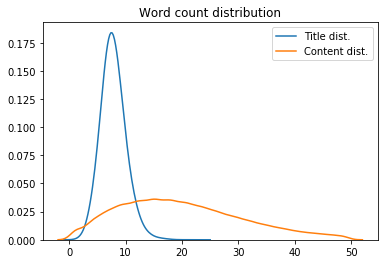

In [40]:
import seaborn as sns
from matplotlib import pyplot as plt 
sns.kdeplot(tl_count[0],bw=1, label='Title dist.')
sns.kdeplot(cont_count[0],bw=1, label='Content dist.')
plt.title('Word count distribution')
